# Pneumonia detection based on Chest X-Ray images on imbalanced data using just few steps and getting accuracy at least 94%

# Intro
Today we are going to apply CNN on X-Ray images of chest. Dataset is imbalanced (approx. 1:3), images may have different site and can have one or 3 color channels.

At start, we will preprocess our data in very simple and intuitive way (load, resize, convert to grayscale, create labels). Model is using grayscale images as for me it did not make too much sense to use X-Ray images as colorful images.

# Load libraries
We will use standard "data science" libraries including numpy, pandas, tensorflow, matplotlib and seaborn. Some additional libraries like glob and cv2 are used.

In [132]:
import glob
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model


import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
import numpy as np
#from imgaug import augmenters as iaa
#import cv2
from keras.layers.normalization import BatchNormalization
#import seaborn as sns
import pandas as pd 
from keras import initializers
from keras import optimizers
import keras.backend as K
import tensorflow as tf
from keras.models import Model

# Load data
Our data consists of 3 folders - train, test, val. Train & test are used for modeling, validation will be used to check performance of model. Size of validation set is very small (16 cases).

We will also create dataframes so we can visualize distribution of cases in each set

This kind of load may not work well for large dataset as you will run out of memory. Data generator with flow_from_directory could be used, but it's really slow

In [133]:
path = '../input/d/mashfiqrizvee/sampledataset2/'


# define paths
train_air_trapping_dir = path + 'Train/Air_trapping/'
train_aortic_elongation_dir = path + 'Train/Aortic_elongation/'
train_calcified_granuloma_dir = path + 'Train/Air_trapping/'
train_calcified_granuloma_dir = path + 'Train/Calcified_granuloma/'
train_callus_rib_fracture_dir = path + 'Train/Callus_rib_fracture/'
train_hiatal_hernia_dir = path + 'Train/Hiatal_hernia/'
train_laminar_atelectasis_fracture_dir = path + 'Train/Laminar_atelectasis/'
train_pleural_effusion_dir = path + 'Train/Pleural_effusion/'

test_air_trapping_dir = path + 'Test/Air_trapping/'
test_aortic_elongation_dir = path + 'Test/Aortic_elongation/'
test_calcified_granuloma_dir = path + 'Test/Calcified_granuloma/'
test_callus_rib_fracture_dir = path + 'Test/Callus_rib_fracture/'
test_hiatal_hernia_dir = path + 'Test/Hiatal_hernia/'
test_laminar_atelectasis_fracture_dir = path + 'Test/Laminar_atelectasis/'
test_pleural_effusion_dir = path + 'Test/Pleural_effusion/'

val_air_trapping_dir = path + 'val/Air_trapping/'
val_aortic_elongation_dir = path + 'val/Aortic_elongation/'
val_calcified_granuloma_dir = path + 'val/Calcified_granuloma/'
val_callus_rib_fracture_dir = path + 'val/Callus_rib_fracture/'
val_hiatal_hernia_dir = path + 'val/Hiatal_hernia/'
val_laminar_atelectasis_fracture_dir = path + 'val/Laminar_atelectasis/'
val_pleural_effusion_dir = path + 'val/Pleural_effusion/'


# find all files, our files has extension jpeg
#train_normal_cases = glob.glob(train_normal_dir + '*png')
train_air_trapping_cases = glob.glob(train_air_trapping_dir + '*png')
train_aortic_elongation_cases = glob.glob(train_aortic_elongation_dir + '*png')
train_calcified_granuloma_cases = glob.glob(train_calcified_granuloma_dir + '*png')
train_callus_rib_fracture_cases = glob.glob(train_callus_rib_fracture_dir + '*png')
train_hiatal_hernia_cases = glob.glob(train_hiatal_hernia_dir + '*png')
train_laminar_atelectasis_fracture_cases = glob.glob(train_laminar_atelectasis_fracture_dir + '*png')
train_pleural_effusion_cases = glob.glob(train_pleural_effusion_dir + '*png')

test_air_trapping_cases = glob.glob(test_air_trapping_dir + '*png')
test_aortic_elongation_cases = glob.glob(test_aortic_elongation_dir + '*png')
test_calcified_granuloma_cases = glob.glob(test_calcified_granuloma_dir + '*png')
test_callus_rib_fracture_cases = glob.glob(test_callus_rib_fracture_dir + '*png')
test_hiatal_hernia_cases = glob.glob(test_hiatal_hernia_dir + '*png')
test_laminar_atelectasis_fracture_cases = glob.glob(test_laminar_atelectasis_fracture_dir + '*png')
test_pleural_effusion_cases = glob.glob(test_pleural_effusion_dir + '*png')

val_air_trapping_cases = glob.glob(val_air_trapping_dir + '*png')
val_aortic_elongation_cases = glob.glob(val_aortic_elongation_dir + '*png')
val_calcified_granuloma_cases = glob.glob(val_calcified_granuloma_dir + '*png')
val_callus_rib_fracture_cases = glob.glob(val_callus_rib_fracture_dir + '*png')
val_hiatal_hernia_cases = glob.glob(val_hiatal_hernia_dir + '*png')
val_laminar_atelectasis_fracture_cases = glob.glob(val_laminar_atelectasis_fracture_dir + '*png')
val_pleural_effusion_cases = glob.glob(val_pleural_effusion_dir + '*png')


# make path using / instead of \\ ... this may be redudant step
'''
train_normal_cases = [x.replace('\\', '/') for x in train_normal_cases]
train_pneu_cases = [x.replace('\\', '/') for x in train_pneu_cases]

test_normal_cases = [x.replace('\\', '/') for x in test_normal_cases]
test_pneu_cases = [x.replace('\\', '/') for x in test_pneu_cases]
val_normal_cases = [x.replace('\\', '/') for x in val_normal_cases]
val_pneu_cases = [x.replace('\\', '/') for x in val_pneu_cases]

'''

# create lists for train, test & validation cases, create labels as well
train_list = []
test_list = []
val_list = []

for x in train_air_trapping_cases:
    train_list.append([x, 0])
    
for x in train_aortic_elongation_cases:
    train_list.append([x, 1])

for x in train_calcified_granuloma_cases:
    train_list.append([x, 2])
    
for x in train_callus_rib_fracture_cases:
    train_list.append([x, 3])

for x in train_hiatal_hernia_cases:
    train_list.append([x,4])
    
for x in train_laminar_atelectasis_fracture_cases:
    train_list.append([x,5])
    
for x in train_pleural_effusion_cases:
    train_list.append([x,6])

for x in test_air_trapping_cases:
    test_list.append([x, 0])
    
for x in test_aortic_elongation_cases:
    test_list.append([x, 1])    

for x in test_calcified_granuloma_cases:
    test_list.append([x, 2])
    
for x in test_callus_rib_fracture_cases:
    test_list.append([x, 3])

for x in test_hiatal_hernia_cases:
    test_list.append([x,4])
    
for x in test_laminar_atelectasis_fracture_cases:
    test_list.append([x,5])
    
for x in test_pleural_effusion_cases:
    test_list.append([x,6])
    
for x in val_air_trapping_cases:
    val_list.append([x, 0])
    
for x in val_aortic_elongation_cases:
    val_list.append([x, 1])
    
for x in val_calcified_granuloma_cases:
    val_list.append([x, 2])
    
for x in val_callus_rib_fracture_cases:
    val_list.append([x, 3])

for x in val_hiatal_hernia_cases:
    val_list.append([x,4])
    
for x in val_laminar_atelectasis_fracture_cases:
    val_list.append([x,5])
    
for x in val_pleural_effusion_cases:
    val_list.append([x,6])


# shuffle/randomize data as they were loaded in order: normal cases, then pneumonia cases
rn.shuffle(train_list)
rn.shuffle(test_list)
rn.shuffle(val_list)


# create dataframes
train_df = pd.DataFrame(train_list, columns=['image', 'label'])
test_df = pd.DataFrame(test_list, columns=['image', 'label'])
val_df = pd.DataFrame(val_list, columns=['image', 'label'])

# Visualize distribution of cases
Now let's draw how are our datasets (im)balanced. You will find out, that training dataset is highly imbalanced, testing dataset is slightly imbalanced and validation dataset is balanced

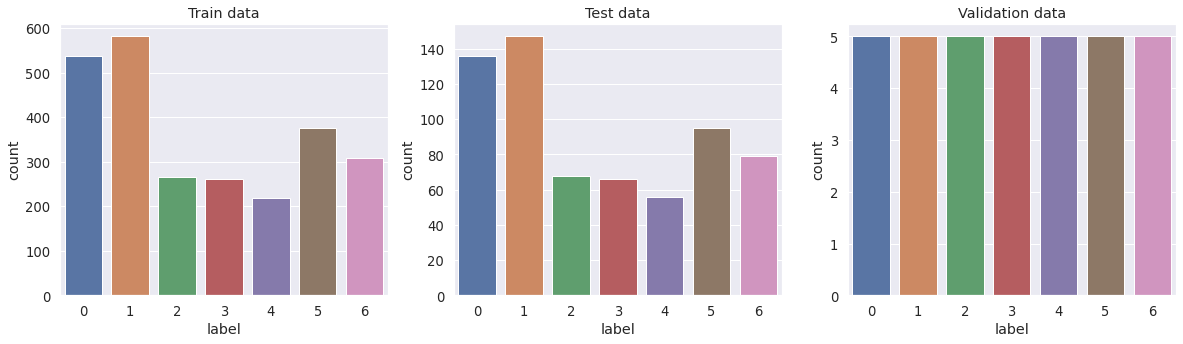

In [134]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.countplot(train_df['label'])
plt.title('Train data')

plt.subplot(1,3,2)
sns.countplot(test_df['label'])
plt.title('Test data')

plt.subplot(1,3,3)
sns.countplot(val_df['label'])
plt.title('Validation data')

plt.show()

# Draw few samples of each case
In this step we simply want to see few cases of pneumonia and few cases of healthy people. For uninterested person it may not be easy to identify pneumonia on image. You will also notice that images does not have same dimension and must be rescaled to same width & height.

# Data preprocessing
In following section we are going to prepare our data for modeling. Down-size of this technique is that you may run out of memory very quickly... but it's really fast!

To make it simple, define 2 functions.
* **process_data** - load image, resize it, convert to grayscale, normalize and reshape to dimension required for tensorflow
* **compose_dataset** - loop through images, generating 2 numpy arrays. First contains image itself as matrix, second contains label

In [135]:
def process_data(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (196, 196))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (196,196,1))
    
    return img

def compose_dataset(df):
    data = []
    labels = []

    for img_path, label in df.values:
        data.append(process_data(img_path))
        labels.append(label)
        
    return np.array(data), np.array(labels)

Using our functions let's prepare our train, test and validation arrays from dataframes

In [136]:
X_train, y_train = compose_dataset(train_df)
X_test, y_test = compose_dataset(test_df)
X_val, y_val = compose_dataset(val_df)

print('Train data shape: {}, Labels shape: {}'.format(X_train.shape, y_train.shape))
print('Test data shape: {}, Labels shape: {}'.format(X_test.shape, y_test.shape))
print('Validation data shape: {}, Labels shape: {}'.format(X_val.shape, y_val.shape))

Train data shape: (2548, 196, 196, 1), Labels shape: (2548,)
Test data shape: (647, 196, 196, 1), Labels shape: (647,)
Validation data shape: (35, 196, 196, 1), Labels shape: (35,)


**Image augmentation** is very important to make our model robust to unseen data. It takes each image and modify it slightly so simply said in each epoch, different image (generated from same) is sent to model for training.

In [137]:
# define generator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)



# fit generator on our train features
datagen.fit(X_train)

It may be redudant step, but we are going to convert our 1D array of target labels into 2D array, changing classification from binary to categorical. During my tests, binary classification was slower and less accurate then categorical.

In [138]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

# Modelling
Simple sequential model is used, starting with 2 convolutional networks of kernel size (7,7) and max pooling with pool size (3,3), followed by 2 convolutional networks of kernel size (7,7) and same pool size and finalized by several repeating sets of 2 convolutional networks of kernel size (3,3) with max pooling and pool size (2,2)

Model bit slower, but getting above 92% accuracy that's great result!

In [139]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19



In [140]:
'''
def vgg():
    base_model = VGG19(weights=None,include_top=False,pooling='avg',input_shape=(196,196,1))
    predictions=Dense(5,activation='softmax',trainable=True)(base_model.output)
    for layer in base_model.layers:
        layer.trainable=True
    model=Model(inputs=[base_model.input], outputs=[predictions])
    
    optim = tf.keras.optimizers.Adam(lr=1e-5,decay=1e-5)
    #loss_func = 'mae'
    
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model

model=None
model = vgg()
model.summary()
'''

"\ndef vgg():\n    base_model = VGG19(weights=None,include_top=False,pooling='avg',input_shape=(196,196,1))\n    predictions=Dense(5,activation='softmax',trainable=True)(base_model.output)\n    for layer in base_model.layers:\n        layer.trainable=True\n    model=Model(inputs=[base_model.input], outputs=[predictions])\n    \n    optim = tf.keras.optimizers.Adam(lr=1e-5,decay=1e-5)\n    #loss_func = 'mae'\n    \n    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])\n    return model\n\nmodel=None\nmodel = vgg()\nmodel.summary()\n"

In [141]:

from keras.optimizers import Adam, RMSprop

In [142]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu', input_shape=(196, 196, 1)))
model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
rmsp_opt = RMSprop(lr=1e-4, decay=0.9)
optimizer = Adam(lr=0.0001, decay=1e-5)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

callback = EarlyStopping(monitor='loss', patience=6) 
history = model.fit(datagen.flow(X_train,y_train, batch_size=8), validation_data=(X_test, y_test), epochs = 100, verbose = 1, callbacks=[callback], class_weight={0:0.677839851, 1: 0.6265060241,2:1.373584906,3:1.394636015,4:1.662100457,5:0.9680851064,6:1.177993528})
#

Epoch 1/100
319/319 [==============================] - 8s 26ms/step - loss: 1.9462 - accuracy: 0.1068 - val_loss: 1.9456 - val_accuracy: 0.1051
Epoch 2/100
319/319 [==============================] - 8s 25ms/step - loss: 1.9458 - accuracy: 0.1452 - val_loss: 1.9449 - val_accuracy: 0.2272
Epoch 3/100
319/319 [==============================] - 7s 23ms/step - loss: 1.9316 - accuracy: 0.2068 - val_loss: 1.8496 - val_accuracy: 0.2519
Epoch 4/100
319/319 [==============================] - 8s 25ms/step - loss: 1.8540 - accuracy: 0.2771 - val_loss: 1.7363 - val_accuracy: 0.3493
Epoch 5/100
319/319 [==============================] - 8s 24ms/step - loss: 1.8086 - accuracy: 0.2971 - val_loss: 1.7616 - val_accuracy: 0.3648
Epoch 6/100
319/319 [==============================] - 7s 23ms/step - loss: 1.7611 - accuracy: 0.3030 - val_loss: 1.6854 - val_accuracy: 0.3138
Epoch 7/100
319/319 [==============================] - 8s 26ms/step - loss: 1.7462 - accuracy: 0.3246 - val_loss: 1.6667 - val_accuracy:

# Evaluation
First, we will quickly check evolution of loss and accuracy over epochs and then draw confusion matrix on test dataa. Then how our validation set (16 cases) will work with trained model and compare real vs predicted label

## Draw loss on train vs test data evolution

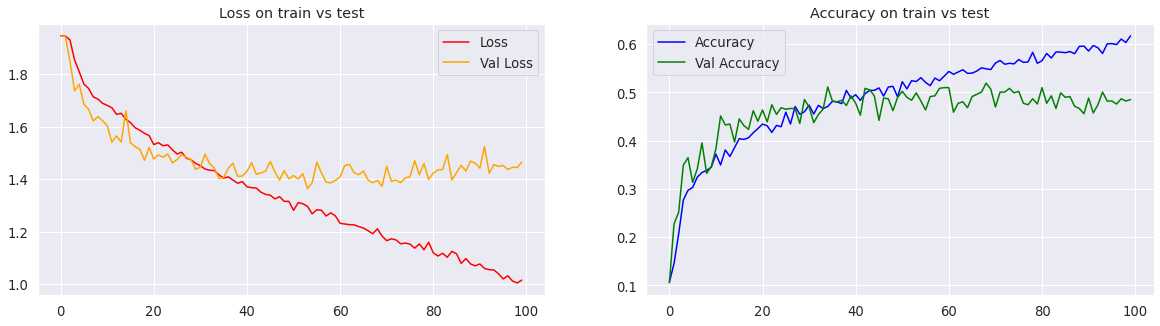

In [143]:
plt.figure(figsize=(20,5))

# plot loss & val loss
plt.subplot(1,2,1)
sns.lineplot(x=history.epoch, y=history.history['loss'], color='red', label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', label='Val Loss')
plt.title('Loss on train vs test')
plt.legend(loc='best')

# plot accuracy and val accuracy
plt.subplot(1,2,2)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], color='blue', label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], color='green', label='Val Accuracy')
plt.title('Accuracy on train vs test')
plt.legend(loc='best')

plt.show()

## Confusion matrix on test data

In [144]:
y_test_hat = model.predict(X_test, batch_size=4)
y_test_hat = np.argmax(y_test_hat, axis=1)
y_test = np.argmax(y_test, axis=1)

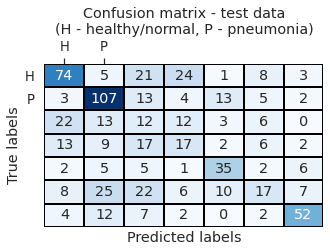

Classification report on test data
              precision    recall  f1-score   support

           0       0.59      0.54      0.56       136
           1       0.61      0.73      0.66       147
           2       0.12      0.18      0.15        68
           3       0.26      0.26      0.26        66
           4       0.55      0.62      0.58        56
           5       0.37      0.18      0.24        95
           6       0.72      0.66      0.69        79

    accuracy                           0.49       647
   macro avg       0.46      0.45      0.45       647
weighted avg       0.49      0.49      0.48       647



In [145]:
# calculate confusion matrix & classification report
conf_m = confusion_matrix(y_test, y_test_hat)
clas_r = classification_report(y_test, y_test_hat)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['H', 'P'], yticklabels=['H', 'P'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
ax.xaxis.set_ticks_position('top') 
plt.title('Confusion matrix - test data\n(H - healthy/normal, P - pneumonia)')
plt.show()

# print classification report
print('Classification report on test data')
print(clas_r)

It seems our algorithm is more likely predicting pneumonia, that is probably caused by imbalanced dataset and even setting class weights in tensorflow fit did not helped so much. We could increase weight for normal/healthy cases to get even better results.

## Validation data
First predict labels and get them to 1D array

In [146]:
y_val_hat = model.predict(X_val, batch_size=4)
y_val_hat = np.argmax(y_val_hat, axis=1)
y_val = np.argmax(y_val, axis=1)

Now let's show images, real & predicted labels

**Wow**, not bad! Actually **great**! There is just one misclassification. Even doctor would have problems to classify it as correct, don't you think?. What about compiling model, creating web app and allow doctors to upload their X-Rays and get information what is likelihood patient has pneumonia? Good business plan ;)

### Thanks for checking my notebook, if you liked it, make sure to **vote** for for this notebook!